In [126]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import tensorflow as tf
from tensorflow import keras
import random

In [26]:
df = pd.read_csv("C:/Users/haris/Desktop/Dataset/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [27]:
df.dtypes


filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [28]:
audio_recording=r"C:\Users\haris\Desktop\Dataset\genres_original\country\country.00065.wav"
data,sr=librosa.load(audio_recording)
print(type(data),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [29]:
librosa.load(audio_recording,sr=45600)


(array([0.02627513, 0.0414679 , 0.04710178, ..., 0.12077784, 0.10198671,
        0.05060357], dtype=float32),
 45600)

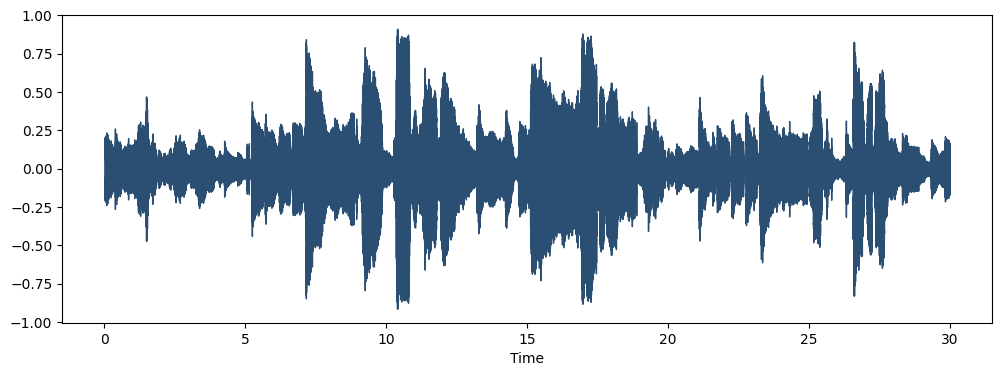

In [30]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,color="#2B4F72")
plt.show()

C:\Users\haris\AppData\Local\Temp\ipykernel_31068\300100370.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')


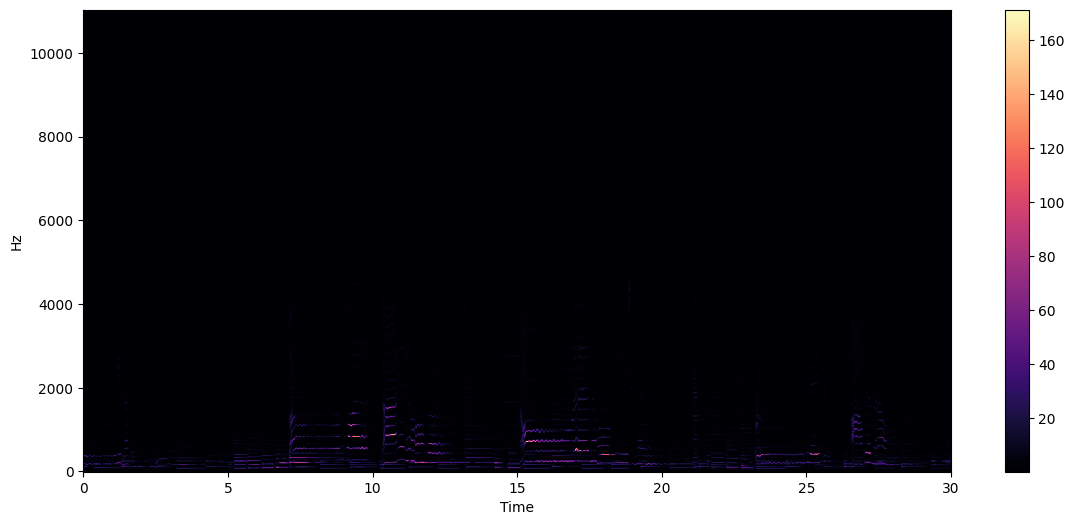

In [31]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

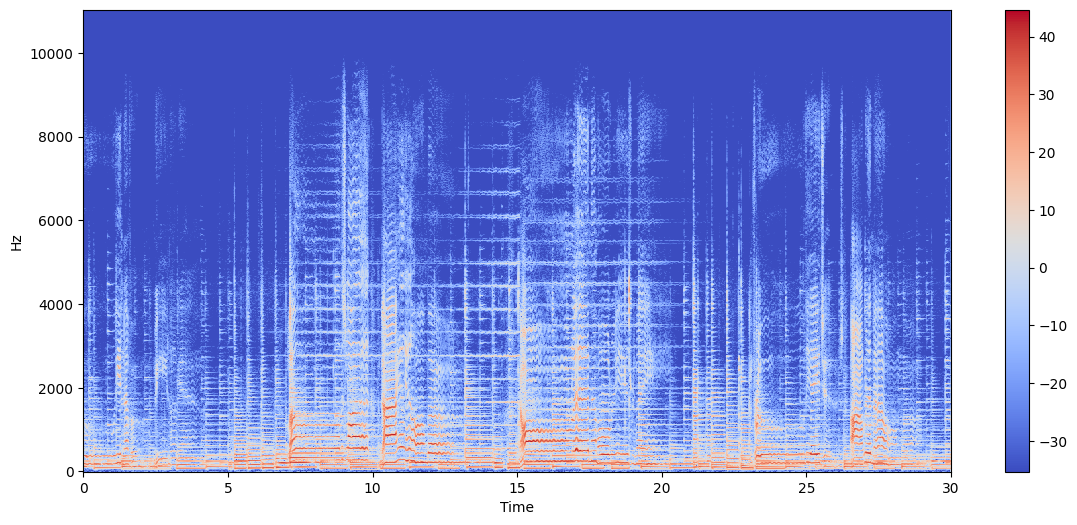

In [32]:
stft=librosa.stft(data)
stft_db=librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14,6))
librosa.display.specshow(stft_db,sr=sr,x_axis='time',y_axis='hz')
plt.colorbar()

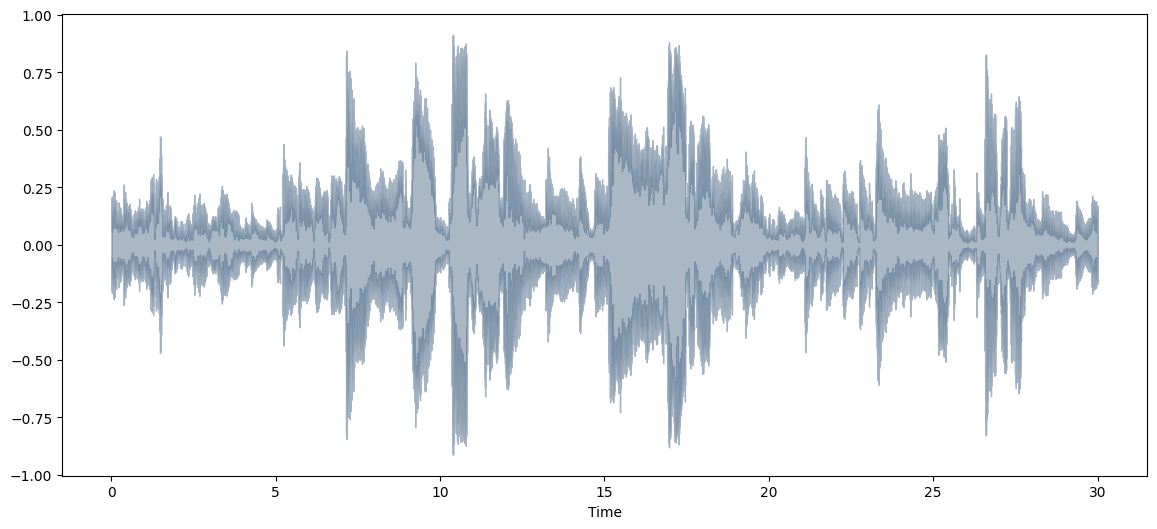

In [33]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=data + 0.01, sr=sr)[0]
plt.figure(figsize=(14,6))
librosa.display.waveshow(data,sr=sr,alpha=0.4,color="#2B4F72")

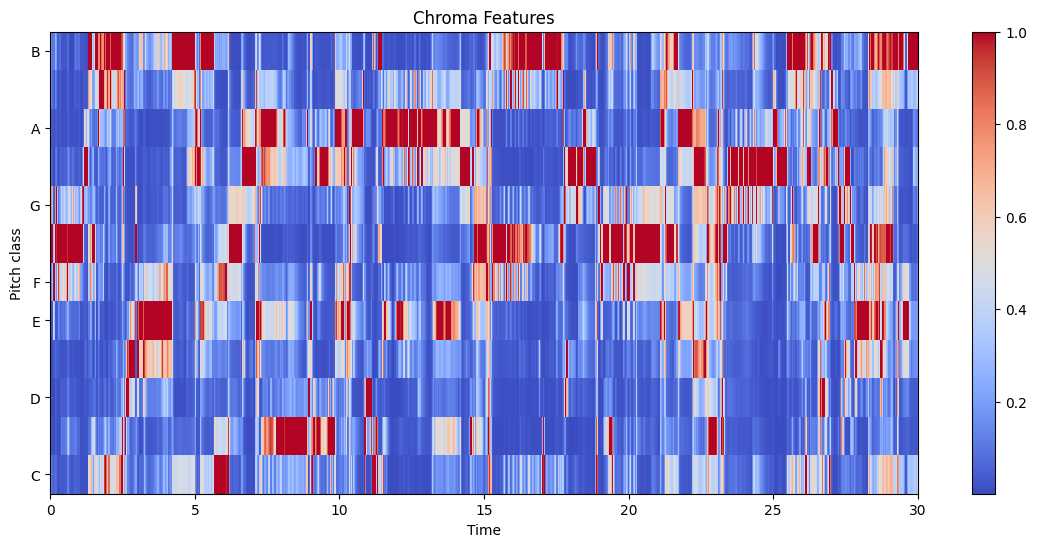

In [34]:
import librosa.display as lplt
chroma = librosa.feature.chroma_stft(y=data, sr=sr)
plt.figure(figsize=(14,6))
lplt.specshow(chroma,sr=sr,x_axis="time",y_axis="chroma",cmap="coolwarm")
plt.colorbar()
plt.title("Chroma Features")
plt.show()

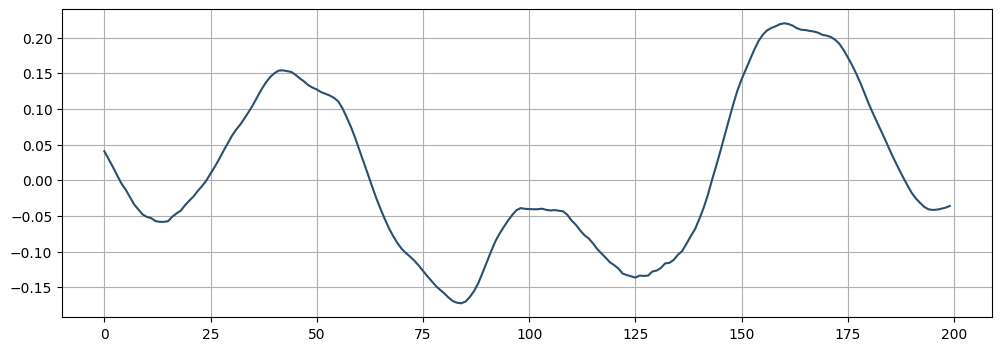

In [35]:
start=1000
end=1200
plt.figure(figsize=(12,4))
plt.plot(data[start:end],color="#2B4F72")
plt.grid()

In [36]:
zero_cross_rate=librosa.zero_crossings(data[start:end],pad=False)
print("the numbert of zero_crossings is :", sum(zero_cross_rate))

the numbert of zero_crossings is : 5


In [37]:
class_list=df.iloc[:,-1]
converter=LabelEncoder()

In [38]:
y=converter.fit_transform(class_list)
y

array([0, 0, 0, ..., 9, 9, 9])

In [39]:
print(df.iloc[:,:-1])


               filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0     blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1     blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2     blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3     blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4     blues.00000.4.wav   66149          0.335579         0.088129  0.143289   
...                 ...     ...               ...              ...       ...   
9985   rock.00099.5.wav   66149          0.349126         0.080515  0.050019   
9986   rock.00099.6.wav   66149          0.372564         0.082626  0.057897   
9987   rock.00099.7.wav   66149          0.347481         0.089019  0.052403   
9988   rock.00099.8.wav   66149          0.387527         0.084815  0.066430   
9989   rock.00099.9.wav   66149          0.369293         0.086759  0.050524   

       rms_var  spectral_centroid_mean 

In [106]:
def prepare_dataset(df, augment=False):
    X, y = [], []
    class_list = df.iloc[:, -1]
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(class_list)

    df_numeric = df.drop(columns=['filename', 'label'])
    scaler = StandardScaler()
    X = scaler.fit_transform(np.array(df_numeric.iloc[:, :-1], dtype=float))

    return X, y, label_encoder

In [107]:
X, y, label_encoder = prepare_dataset(df, augment=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [108]:
len(y_test)

3297

In [109]:
len(y_train)

6693

In [110]:
from sklearn.model_selection import cross_val_score

In [111]:
neighbors_range = np.arange(1, 21)
mean_accuracies = []

In [112]:
for n in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
    
    accuracy = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracies.append(accuracy.mean())

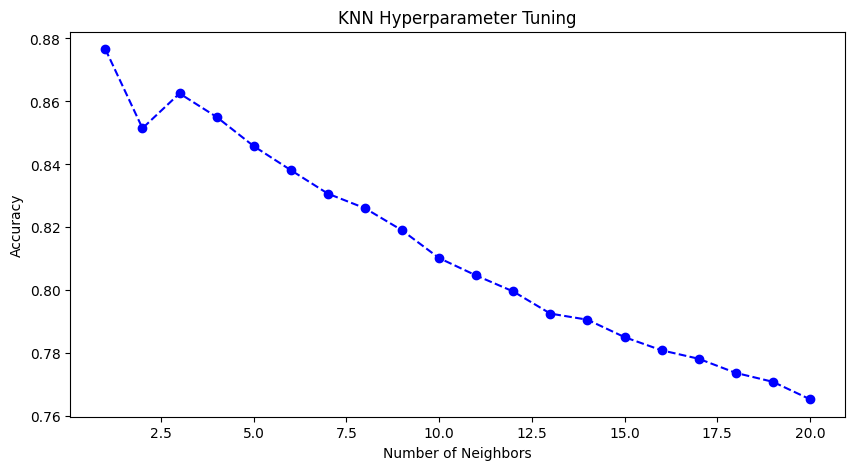

In [113]:
plt.figure(figsize=(10, 5))
plt.plot(neighbors_range, mean_accuracies, marker='o', linestyle='dashed', color='blue')
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN Hyperparameter Tuning")
plt.show()

In [122]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [129]:
# Hyperparameter tuning for K-Nearest Neighbors
knn_params = {
    'n_neighbors': np.arange(1, 21), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']  
}

# Hyperparameter tuning for Gradient Boosting
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9]
}

# Hyperparameter tuning for Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [133]:
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
knn_grid.fit(X_train, y_train)

print("Best Hyperparameters for KNN:", knn_grid.best_params_)

best_knn = knn_grid.best_estimator_
y_pred_knn = best_knn.predict(X_test)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
Best Hyperparameters for KNN: {'metric': 'manhattan', 'n_neighbors': np.int64(1), 'weights': 'uniform'}


In [134]:
'''
#Selecting the best parameters for RandomForest
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print("Best Hyperparameters for RF:", rf_grid.best_params_)

best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)
'''

best_rf = RandomForestClassifier(n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_rf = best_rf.predict(X_test)

In [135]:
'''
#Selecting the best parameters for GradientBoost
gb_grid = GridSearchCV(KNeighborsClassifier(), gb_params, cv=3, scoring='accuracy', n_jobs=-1, verbose=1)
gb_grid.fit(X_train, y_train)

print("Best Hyperparameters for GB:", gb_grid.best_params_)

best_gb = gb_grid.best_estimator_
y_pred_gb = best_gb.predict(X_test)
'''

best_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, subsample=0.9, random_state=42)
best_gb.fit(X_train, y_train)
y_pred_gb = best_gb.predict(X_test)

In [136]:
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Test Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    
    plt.figure(figsize=(10, 6))
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

Best Random Forest Test Accuracy: 0.8635
              precision    recall  f1-score   support

       blues       0.89      0.88      0.88       348
   classical       0.91      0.97      0.94       309
     country       0.78      0.82      0.80       309
       disco       0.83      0.86      0.84       311
      hiphop       0.92      0.86      0.89       360
        jazz       0.87      0.88      0.87       333
       metal       0.88      0.90      0.89       346
         pop       0.88      0.84      0.86       323
      reggae       0.84      0.88      0.86       330
        rock       0.84      0.75      0.79       328

    accuracy                           0.86      3297
   macro avg       0.86      0.86      0.86      3297
weighted avg       0.86      0.86      0.86      3297



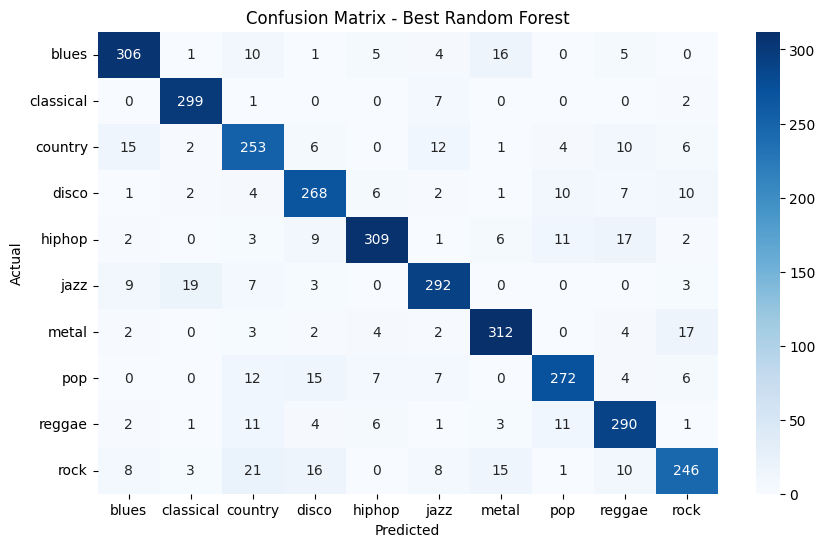

Best Gradient Boosting Test Accuracy: 0.8198
              precision    recall  f1-score   support

       blues       0.86      0.82      0.84       348
   classical       0.94      0.94      0.94       309
     country       0.70      0.81      0.75       309
       disco       0.76      0.77      0.77       311
      hiphop       0.85      0.79      0.82       360
        jazz       0.85      0.89      0.87       333
       metal       0.91      0.86      0.88       346
         pop       0.82      0.85      0.83       323
      reggae       0.79      0.78      0.79       330
        rock       0.73      0.69      0.71       328

    accuracy                           0.82      3297
   macro avg       0.82      0.82      0.82      3297
weighted avg       0.82      0.82      0.82      3297



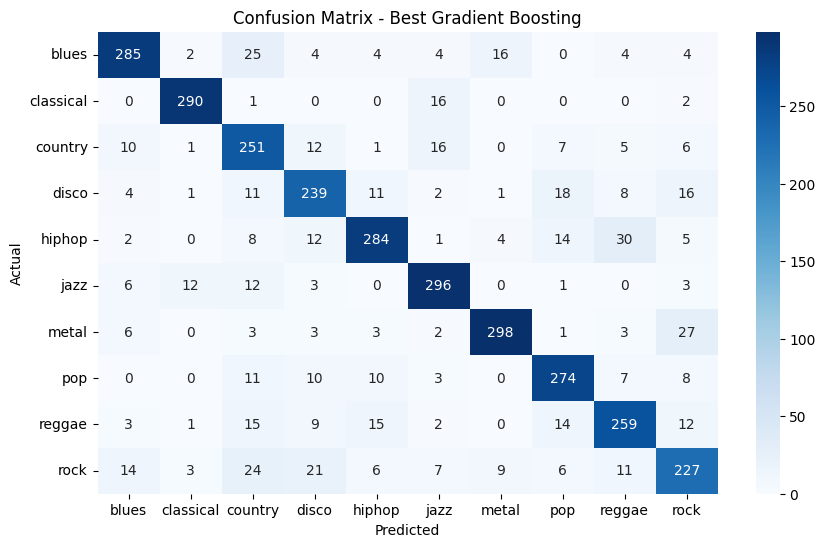

Best K-Nearest Neighbors Test Accuracy: 0.9254
              precision    recall  f1-score   support

       blues       0.92      0.96      0.94       348
   classical       0.94      0.95      0.95       309
     country       0.90      0.87      0.88       309
       disco       0.88      0.92      0.90       311
      hiphop       0.95      0.93      0.94       360
        jazz       0.93      0.89      0.91       333
       metal       0.97      0.95      0.96       346
         pop       0.97      0.91      0.94       323
      reggae       0.93      0.98      0.95       330
        rock       0.88      0.90      0.89       328

    accuracy                           0.93      3297
   macro avg       0.93      0.92      0.92      3297
weighted avg       0.93      0.93      0.93      3297



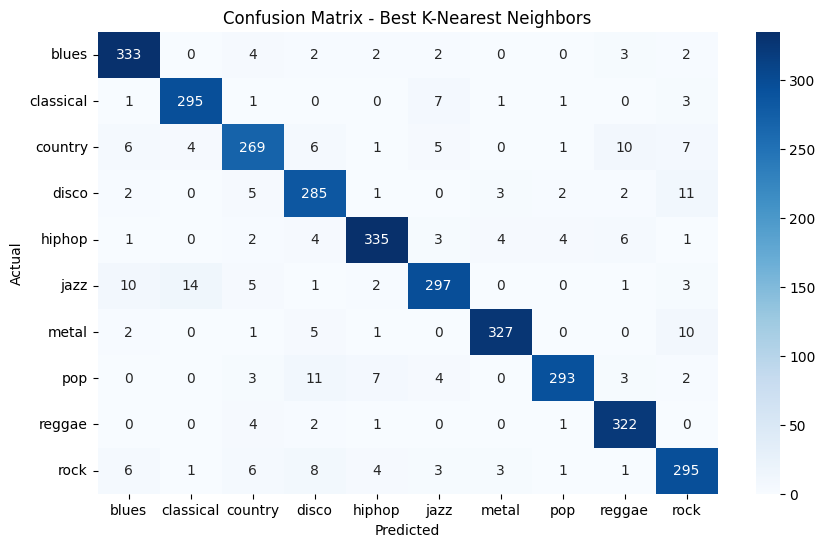

In [137]:
evaluate_model(y_test, y_pred_rf, "Best Random Forest")
evaluate_model(y_test, y_pred_gb, "Best Gradient Boosting")
evaluate_model(y_test, y_pred_knn, "Best K-Nearest Neighbors")